In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. Membaca dataset
df = pd.read_csv(r'C:\Users\OPTION\Downloads\Python DA\Projects 23_Traveloka Web Scrapping & Hotels Analysis\Hotel List Jakarta - TRAVELOKA - 1-30.csv')
df

,Hotel,Star,Rating,Reviews,Harga,Places Nearby,Facil + Akomod
0,Hotel Indonesia Kempinski Jakarta,5,8.9,4363.000,2.480.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Food and Drinks\nA la carte breakfast\nA la ca...
1,"The Langham, Jakarta",5,8.8,238.000,3.823.600,Nearby Places\n\nPig Me Up! - Ashta District 8...,Food and Drinks\nA la carte dinner\nA la carte...
2,Manhattan Hotel,5,8.5,8405.000,6.231.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Hotel Services\nBellhop\nConcierge\nMoney chan...
3,Aloft South Jakarta,4,8.9,424.000,762.300,Nearby Places\n\nSouthside Rooftop Bar & Loung...,Public Facilities\nParking\nCoffee shop\nEleva...
4,"The Mayflower, Jakarta - Marriott Executive Ap...",5,9.0,393.000,1.756.254,Nearby Places\n\nSudirman Plaza\nBusiness\n2 m...,Food and Drinks\nA la carte breakfast\nA la ca...
5,Merlynn Park Hotel,5,8.6,18892.000,820.000,Nearby Places\n\nMan Aur Tan at Merlynn Park H...,Hotel Services\nBellhop\nConcierge\nMoney chan...
6,ASTON Priority Simatupang & Conference Center,4,8.6,7037.000,3.361.380,Nearby Places\n\nCanary Coffee Shop at Aston P...,Public Facilities\nParking\nCoffee shop\nEleva...
7,Ascott Sudirman Jakarta,5,8.6,2126.000,4.344.540,Nearby Places\n\nDAON Dine & Coffee - Tokopedi...,In-room Facilities\nBathrobe\nBathtub\nDesk\nH...
8,"The Hermitage, a Tribute Portfolio Hotel, Jakarta",5,8.9,365.000,5.504.291,Nearby Places\n\nHermitage Lounge at The Hermi...,Food and Drinks\nA la carte breakfast\nA la ca...
9,The Ritz-Carlton Mega Kuningan,5,8.8,2860.000,5.692.687,Nearby Places\n\nLobo Italian Bistro at The Ri...,Food and Drinks\nA la carte breakfast\nA la ca...


In [5]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (30, 7)


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel           30 non-null     object 
 1   Star            30 non-null     int64  
 2   Rating          30 non-null     float64
 3   Reviews         30 non-null     float64
 4   Harga           29 non-null     object 
 5   Places Nearby   30 non-null     object 
 6   Facil + Akomod  30 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ KB


,Star,Rating,Reviews
count,30.000000,30.000000,30.000000
mean,4.533333,8.626667,3086.698600
std,0.571346,0.231834,3786.253102
min,3.000000,8.100000,1.433000
25%,4.000000,8.500000,437.500000
50%,5.000000,8.600000,1940.500000
75%,5.000000,8.800000,4297.500000
max,5.000000,9.000000,18892.000000


In [8]:
# Pastikan kolom yang seharusnya numerik dikonversi
df['Star'] = pd.to_numeric(df['Star'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [9]:
# Misalnya kolom Harga berbentuk string dengan simbol atau pemisah ribuan, kita bersihkan:
# df['Harga_numeric'] = df['Harga'].replace({'[^\d.]': ''}, regex=True).astype(float)

ValueError: could not convert string to float: '2.480.500'

In [10]:
# --- Fungsi untuk menghapus outlier menggunakan metode IQR ---
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [16]:
# Buat salinan data untuk cleaning
df_cleaned = df.copy()

# 1. Hapus duplikat
df_cleaned = df_cleaned.drop_duplicates()

# 2. Hapus missing values pada kolom penting
df_cleaned = df_cleaned.dropna(subset=['Star', 'Reviews', 'Rating'])

# 3. Hapus outlier pada kolom numerik
for col in ['Star', 'Reviews', 'Rating']:
    df_cleaned = remove_outliers(df_cleaned, col)

# 4. Hapus kolom 'Facil + Akomod'
if 'Facil + Akomod' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['Facil + Akomod'])

In [18]:
# # --- Visualisasi Histogram dan Box Plot 
# plt.figure(figsize=(12, 5))
# plt.subplot(1,2,1)
# sns.histplot(df_cleaned['Harga_numeric'], kde=True, color='skyblue')
# plt.title('Histogram Harga (Data Cleaned)')

# plt.subplot(1,2,2)
# sns.boxplot(x=df_cleaned['Harga_numeric'], color='lightgreen')
# plt.title('Boxplot Harga (Data Cleaned)')
# plt.tight_layout()
# plt.show()


In [20]:
# --- Membandingkan data sebelum dan sesudah cleaning ---
print("Statistik Data Sebelum Cleaning:")
print(df.describe(include='all'))
print("\nStatistik Data Setelah Cleaning:")
print(df_cleaned.describe(include='all'))

# --- Simpan dataset yang sudah dibersihkan ---
cleaned_filename = 'Hotel List Jakarta - TRAVELOKA - 1-30-CLEANED.csv'
df_cleaned.to_csv(cleaned_filename, index=False)
print(f"\nDataset yang sudah dibersihkan disimpan sebagai: {cleaned_filename}")


Statistik Data Sebelum Cleaning:
                         Hotel       Star     Rating       Reviews      Harga  \
count                       30  30.000000  30.000000     30.000000         29   
unique                      28        NaN        NaN           NaN         27   
top     Yuan Garden Pasar Baru        NaN        NaN           NaN  4.344.540   
freq                         2        NaN        NaN           NaN          2   
mean                       NaN   4.533333   8.626667   3086.698600        NaN   
std                        NaN   0.571346   0.231834   3786.253102        NaN   
min                        NaN   3.000000   8.100000      1.433000        NaN   
25%                        NaN   4.000000   8.500000    437.500000        NaN   
50%                        NaN   5.000000   8.600000   1940.500000        NaN   
75%                        NaN   5.000000   8.800000   4297.500000        NaN   
max                        NaN   5.000000   9.000000  18892.000000        Na

In [22]:
# --- Menghitung metrik-metrik terukur ---
total_hotels = df_cleaned['Hotel'].nunique()
avg_star = df_cleaned['Star'].mean()
avg_rating = df_cleaned['Rating'].mean()
total_reviewers = df_cleaned['Reviews'].sum()
# total_revenue = df_cleaned['Harga_numeric'].sum()
# avg_price = df_cleaned['Harga_numeric'].mean()

print("Metrik Terukur:")
print("Total Hotels (unik):", total_hotels)
print("Average Star:", avg_star)
print("Average Rating:", avg_rating)
print("Total Reviewers:", total_reviewers)
# print("Total Revenue:", total_revenue)
# print("Average Price:", avg_price)

Metrik Terukur:
Total Hotels (unik): 27
Average Star: 4.517241379310345
Average Rating: 8.627586206896552
Total Reviewers: 73708.958


In [23]:
# # --- Bar Chart: Hotel Ranks By Price ---
# # Menghitung rata-rata harga per hotel
# hotel_price = df_cleaned.groupby('Hotel')['Harga_numeric'].mean().sort_values(ascending=False).head(10)
# plt.figure(figsize=(10, 6))
# sns.barplot(x=hotel_price.index, y=hotel_price.values, palette="viridis")
# plt.title("Top 10 Hotel Ranks By Average Price")
# plt.xlabel("Hotel")
# plt.ylabel("Average Price")
# plt.xticks(rotation=45)
# plt.show()

KeyError: 'Column not found: Harga_numeric'

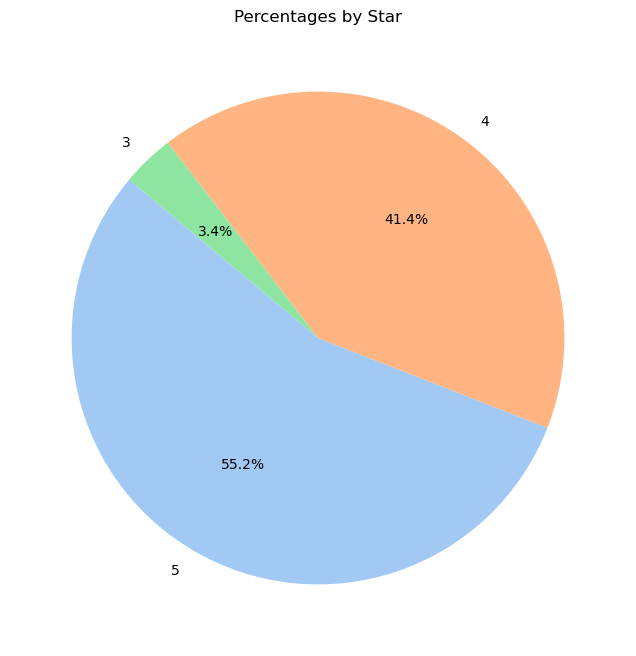

In [24]:
# --- Pie Chart: Percentages By Star ---
star_counts = df_cleaned['Star'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Percentages by Star")
plt.show()

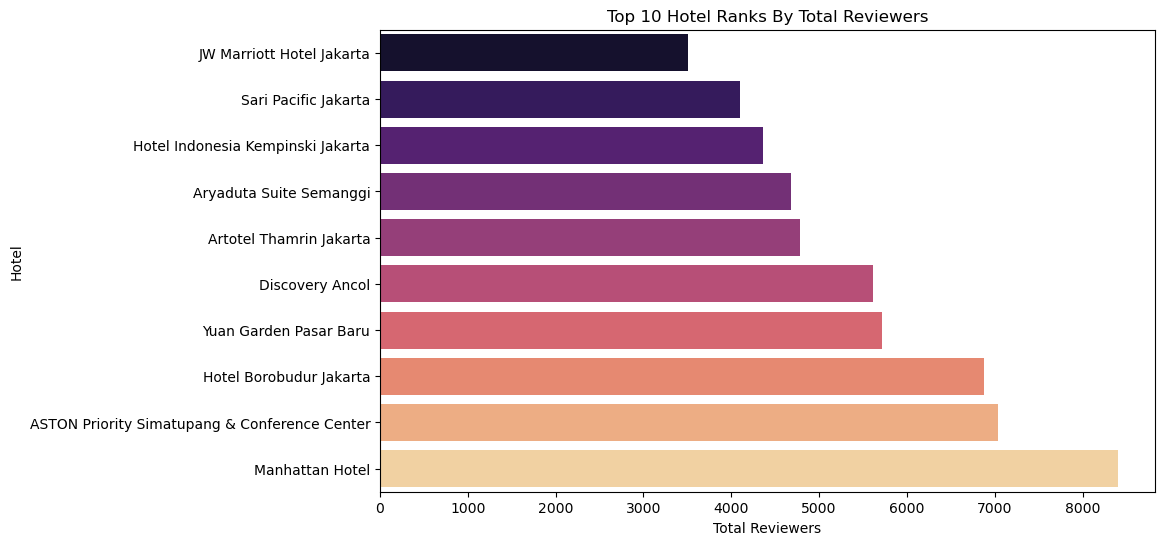

In [25]:
# --- Horizontal Bar Chart: Hotel Ranks By Reviewers ---
hotel_reviewers = df_cleaned.groupby('Hotel')['Reviews'].sum().sort_values(ascending=True).tail(10)
plt.figure(figsize=(10,6))
sns.barplot(x=hotel_reviewers.values, y=hotel_reviewers.index, palette="magma")
plt.title("Top 10 Hotel Ranks By Total Reviewers")
plt.xlabel("Total Reviewers")
plt.ylabel("Hotel")
plt.show()

In [ ]:
# import dash
# from dash import dcc, html
# import plotly.express as px

# # Membuat figure dengan Plotly Express berdasarkan data yang sudah dihitung
# fig_price = px.bar(hotel_price.reset_index(), x='Hotel', y='Harga_numeric',
#                    title="Top 10 Hotel Ranks By Average Price", labels={'Harga_numeric':'Average Price'})
# fig_star = px.pie(values=star_counts.values, names=star_counts.index, title="Percentages by Star")
# fig_reviewers = px.bar(hotel_reviewers.reset_index(), x='Reviews', y='Hotel',
#                        orientation='h', title="Top 10 Hotel Ranks By Total Reviewers", labels={'Reviews':'Total Reviewers'})

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("Hotel Data Dashboard"),
#     html.Div([
#         html.H3(f"Total Hotels (unik): {total_hotels}"),
#         html.H3(f"Average Star: {avg_star:.2f}"),
#         html.H3(f"Average Rating: {avg_rating:.2f}"),
#         html.H3(f"Total Reviewers: {total_reviewers}"),
#         html.H3(f"Total Revenue: {total_revenue:,.2f}"),
#         html.H3(f"Average Price: {avg_price:.2f}")
#     ], style={'padding': '20px', 'backgroundColor': '#f9f9f9'}),
#     dcc.Graph(figure=fig_price),
#     dcc.Graph(figure=fig_star),
#     dcc.Graph(figure=fig_reviewers)
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
